In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [11]:
### LES points de controle ###
 
T = [0,0,0,1,1,2,2,3,3,4]   
a = sqrt(3)
X = [1,0,1/2,1,3/2,2,1]
Y = [0,0,a/2,a,a/2,0,0]


### Le reste
#T = np.array([0,0,0,0.5,1,1,1])
n = len(T)-1
p = n-len(X)
#n = len(X)+p#n-p = len(X), nous voulons 4 points de controle et des b-splines de degré 2



In [12]:
def b(t,T,i,p):
    if p == 0:
        u = np.array([])
        for k in range(len(t)):
            if T[i] <= t[k] and t[k] < T[i+1]:
                u = np.append(u,1)
            else : 
                u = np.append(u,0)

    else:
        u  = 0.0 if T[i+p ]  == T[i]  else (t-T[i])/(T[i+p]- T[i]) * b(t,T,i,p-1)
        u += 0.0 if T[i+p+1] == T[i+1] else (T[i+p+1]-t)/(T[i+p+1]-T[i+1]) * b(t,T,i+1,p-1)
    return u
                

In [19]:
def b_spline(T,X,Y,p):
    n = len(T)-1

    t = np.arange(T[p],T[n-p],0.001)
    
    B = np.zeros((n-p,len(t)))
    
    for i in range(0,n-p):
        B[i,:] = b(t,T,i,p)
    W = np.array([1,0.5,1,0.5,1,0.5,1])
    w = W @ B
    x = W * X @ B / w
    y = W * Y @ B / w
    return x,y


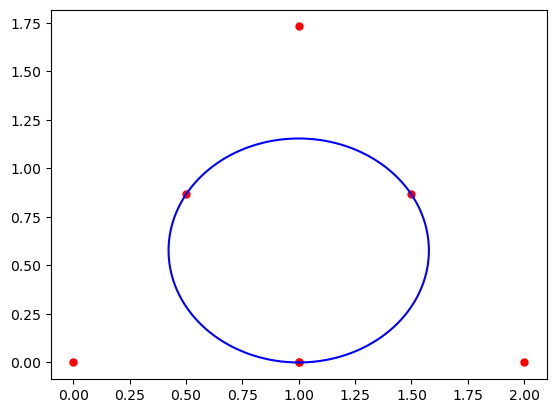

In [20]:
fig = plt.figure("Approximation avec des B-splines")
plt.plot(X,Y,'.r',markersize=10)

x,y = b_spline(T,X,Y,p)
plt.plot(x,y,'-b')